In [68]:
#Librerias
import os
import pandas as pd
import numpy as np

In [69]:
# carga de los datasets
path="C://Users//Usuario//Desktop//TFM//"
os.chdir(path)

freelances_dataset=pd.read_csv("freelances_final.csv")
companies_dataset=pd.read_csv("companies_final.csv")

In [70]:
from scipy.spatial import distance

#Reagrupando los datos para trabajar 
comp_names=companies_dataset.Company_Name.tolist()
freelances_names=freelances_dataset.Respondent.tolist()

companies=np.array(companies_dataset.drop(["Company_Name"], axis=1))
freelances=np.array(freelances_dataset.drop(["Respondent"], axis=1))


#Buscando todas las combinaciones posibles
tuples = []
#compania_t=companias.index.values
lista=[]

for c in range(len(companies)):
    for f in range(len(freelances)):
        comp_a=companies
        free_b=freelances
        dst=distance.euclidean(comp_a[c], free_b[f])
        lista.append(dst)
        tuples.append([comp_names[c],freelances_names[f]])

df_match_euclidean=pd.DataFrame({'company-freelance' : tuples, 'score':lista})
print(df_match_euclidean)


            company-freelance       score
0               [Company1, 1]  144.239384
1               [Company1, 2]   44.777226
2               [Company1, 3]  146.982992
3               [Company1, 4]  146.986394
4               [Company1, 5]   44.766059
...                       ...         ...
24257019  [Company472, 51388]  190.808805
24257020  [Company472, 51389]    2.645751
24257021  [Company472, 51390]    2.828427
24257022  [Company472, 51391]  163.731488
24257023  [Company472, 51392]    2.645751

[24257024 rows x 2 columns]


In [16]:
#Lectura para el jaccard
freelances_dummies=pd.read_excel("Freelancers_dummies.xlsx")
companies_dummies=pd.read_excel("Companies_dummies.xlsx")

In [20]:
from sklearn.metrics import jaccard_score
import numpy as np

# Ejemplo
comp_dummies=companies_dataset.Company_Name.tolist()
freelances__dummies=freelances_dataset.Respondent.tolist()

dummies_companies=np.array(companies_dataset.drop(["Company_Name"], axis=1))
dummies_freelances=np.array(freelances_dataset.drop(["Respondent"], axis=1))



#Buscando todas las combinaciones posibles
tuples = []
#compania_t=companias.index.values
lista=[]

for i in range(len(dummies_companies)):
    for j in range(len(dummies_freelances)):
        comp_x=dummies_companies
        free_y=dummies_freelances
        jaccard=jaccard_score(comp_x[i], free_y[j],average="weighted")
        lista.append(jaccard)
        tuples.append([comp_dummies[i],freelances__dummies[j]])
                      
df_match=pd.DataFrame({'company-freelance' : tuples, 'score':lista})
print(df_match)

            company-freelance     score
0               [Company1, 1]  0.527473
1               [Company1, 2]  0.426036
2               [Company1, 3]  0.576923
3               [Company1, 4]  0.527473
4               [Company1, 5]  0.466154
...                       ...       ...
24257019  [Company472, 51388]  0.403846
24257020  [Company472, 51389]  0.590237
24257021  [Company472, 51390]  0.559172
24257022  [Company472, 51391]  0.403846
24257023  [Company472, 51392]  0.590237

[24257024 rows x 2 columns]


In [55]:
df_match.to_csv("jaccard_score.csv",index=False)

In [56]:
df_match[['Company', 'Freelance']]=pd.DataFrame(df_match['company-freelance'].tolist(), index=df_match.index) 
df_match.drop(["company-freelance"], axis=1)
df_jaccard=df_match[["Company","Freelance","score"]]
df_jaccard

,Company,Freelance,score
0,Company1,1,0.527473
1,Company1,2,0.426036
2,Company1,3,0.576923
3,Company1,4,0.527473
4,Company1,5,0.466154
...,...,...,...
24257019,Company472,51388,0.403846
24257020,Company472,51389,0.590237
24257021,Company472,51390,0.559172
24257022,Company472,51391,0.403846


In [147]:
c1=df_jaccard.groupby(["Company"]).get_group('Company1').sort_values('score', ascending=False).head(5)
c2=df_jaccard.groupby(["Company"]).get_group('Company35').sort_values('score', ascending=False).head(5)
c3=df_jaccard.groupby(["Company"]).get_group('Company50').sort_values('score', ascending=False).head(5)
c4=df_jaccard.groupby(["Company"]).get_group('Company95').sort_values('score', ascending=False).head(5)
c5=df_jaccard.groupby(["Company"]).get_group('Company120').sort_values('score', ascending=False).head(5)
c6=df_jaccard.groupby(["Company"]).get_group('Company242').sort_values('score', ascending=False).head(5)
c7=df_jaccard.groupby(["Company"]).get_group('Company300').sort_values('score', ascending=False).head(5)
c8=df_jaccard.groupby(["Company"]).get_group('Company472').sort_values('score', ascending=False).head(5)
ct=pd.concat([c1,c2,c3])


In [148]:
prueba1=df_jaccard.head(5)

In [149]:
import networkx as nx
DG=nx.DiGraph()
for row in ct.iterrows():
    DG.add_edge(row[1]["Freelance"], row[1]["Company"], score=row[1]["score"])
    

In [150]:
DG.nodes(data=True)

NodeDataView({46156: {}, 'Company1': {}, 25933: {}, 37629: {}, 50565: {}, 7769: {}, 27385: {}, 'Company35': {}, 35199: {}, 18648: {}, 47258: {}, 50582: {}, 'Company50': {}, 51127: {}, 2587: {}, 48949: {}})

Para visualizar el grafo completo

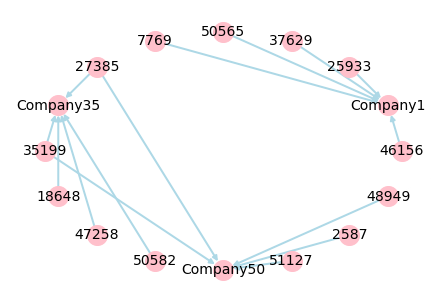

In [153]:
nx.draw_circular(DG, node_color="pink",edge_color="lightblue", font_size=14,width=2, with_labels=True, node_size=400,)

Ejemplo de freelancers y companias